In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
data = pd.read_csv('/content/train_adikara2024.csv')
data.head()

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0
1,60601,South Africa,2002,7,43.9
2,64399,Japan,2004,8,89.8
3,24227,France,1983,1,48.9
4,63779,Japan,2004,4,90.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11616 non-null  int64  
 1   Country         11616 non-null  object 
 2   Year            11616 non-null  int64  
 3   Month           11616 non-null  int64  
 4   FoodPriceIndex  11268 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 453.9+ KB


In [ ]:
data.isnull().sum()

,0
id,0
Country,0
Year,0
Month,0
FoodPriceIndex,348


In [ ]:
data.describe(include='all')

,id,Country,Year,Month,FoodPriceIndex
count,11616.000000,11616,11616.000000,11616.000000,11268.000000
unique,NaN,22,NaN,NaN,NaN
top,NaN,Mexico,NaN,NaN,NaN
freq,NaN,528,NaN,NaN,NaN
mean,40919.409091,NaN,1991.500000,6.500000,54.084543
std,23626.188200,NaN,12.698972,3.452201,30.192230
min,7.000000,NaN,1970.000000,1.000000,0.000000
25%,20464.250000,NaN,1980.750000,3.750000,29.875000
50%,40921.500000,NaN,1991.500000,6.500000,60.300000
75%,61378.750000,NaN,2002.250000,9.250000,78.200000


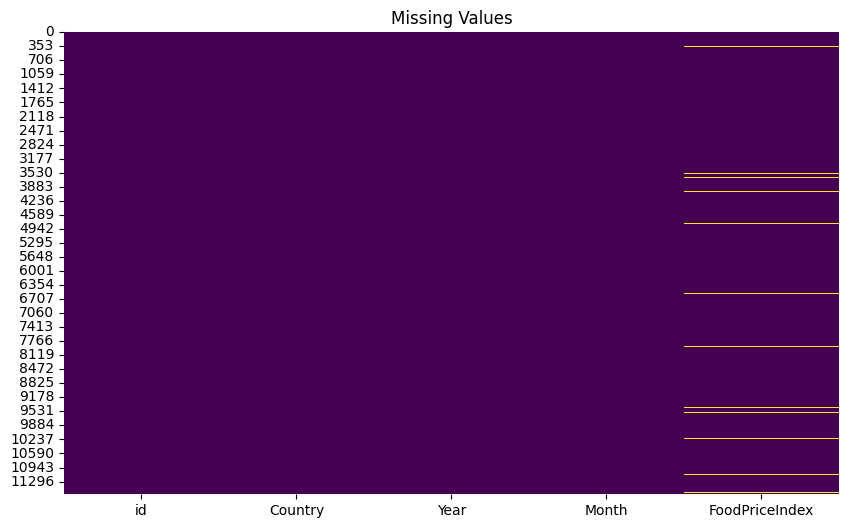

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values")
plt.show()

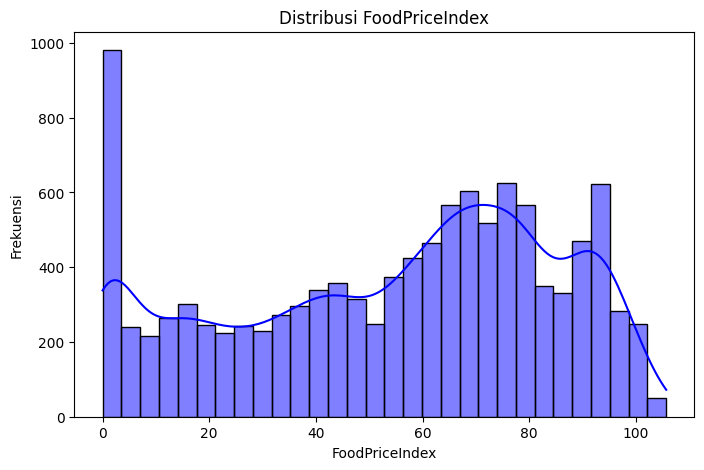

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['FoodPriceIndex'], kde=True, bins=30, color='blue')
plt.title("Distribusi FoodPriceIndex")
plt.xlabel("FoodPriceIndex")
plt.ylabel("Frekuensi")
plt.show()

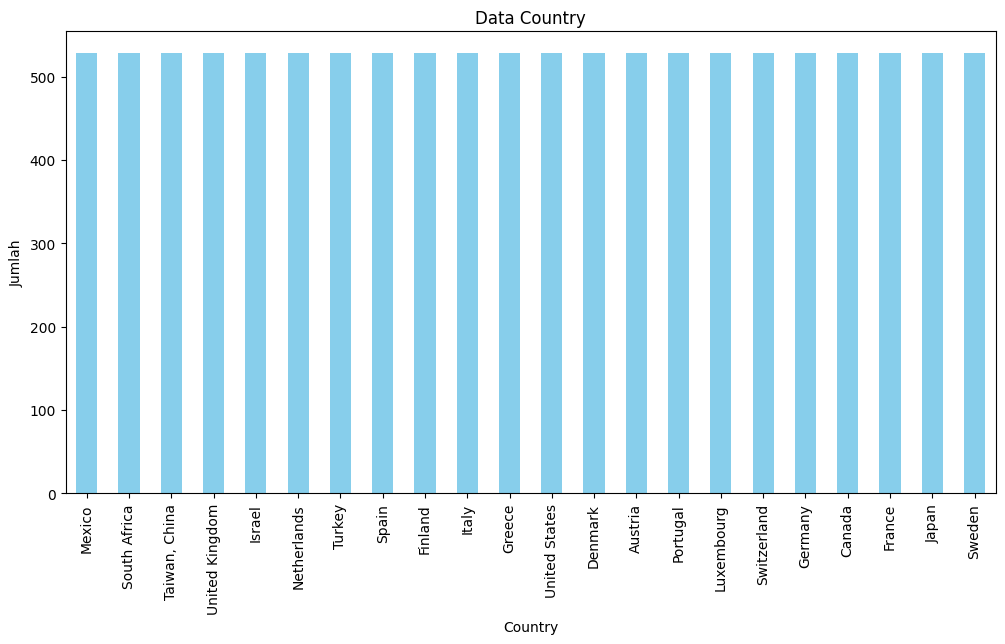

In [ ]:
plt.figure(figsize=(12, 6))
country_counts = data['Country'].value_counts()
country_counts.plot(kind='bar', color='skyblue')
plt.title("Data Country")
plt.xlabel("Country")
plt.ylabel("Jumlah")
plt.show()

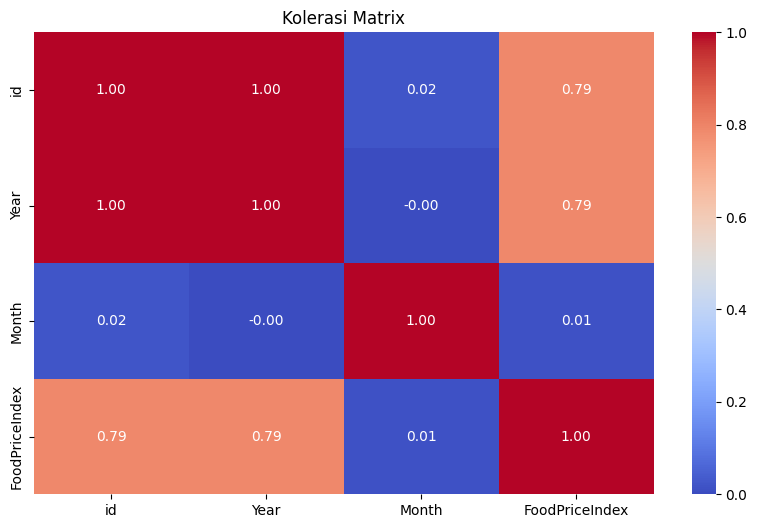

In [ ]:
plt.figure(figsize=(10, 6))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Kolerasi Matrix")
plt.show()

In [ ]:
data = data.dropna(subset=['FoodPriceIndex'])
data.isnull().sum()

,0
id,0
Country,0
Year,0
Month,0
FoodPriceIndex,0


In [ ]:
features = pd.get_dummies(data.drop(columns=['FoodPriceIndex', 'id']), columns=['Country'], drop_first=True)
target = data['FoodPriceIndex']
train_columns = features.columns
features.head()

,Year,Month,Country_Canada,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Israel,Country_Italy,...,Country_Netherlands,Country_Portugal,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,"Country_Taiwan, China",Country_Turkey,Country_United Kingdom,Country_United States
0,1971,11,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2002,7,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,2004,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1983,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2004,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x = features
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
cv_scores = cross_val_score(best_model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Mean Cross-Validasi MSE: {cv_mse}")
print(f"Standar Deviasi CV MSE: {cv_std}")

Mean Cross-Validasi MSE: 0.4263053669544535
Standar Deviasi CV MSE: 0.05387591409354892


In [ ]:
y_pred = best_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Validasi Mean Squared Error:", mse)
print("Validasi R-squared:", r2)

Validasi Mean Squared Error: 0.060065444171413386
Validasi R-squared: 0.9999339117217177


In [ ]:
test_data = pd.read_csv('test_adikara2024_unlabeled.csv')
test_features = pd.get_dummies(test_data.drop(columns=['id']), columns=['Country'], drop_first=True)
test_features = test_features.reindex(columns=train_columns, fill_value=0)
test_features.head()

,Year,Month,Country_Canada,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Israel,Country_Italy,...,Country_Netherlands,Country_Portugal,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,"Country_Taiwan, China",Country_Turkey,Country_United Kingdom,Country_United States
0,2023,4,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2022,7,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019,6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2021,2,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,2019,8,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_predictions = best_model.predict(test_features)

submission = pd.DataFrame({
    'id': test_data['id'],
    'FoodPriceIndex': test_predictions
})

In [ ]:
submission.to_csv('submission_Manusia Pelupa_ADIKARA2024.csv', index=False)
print("'submission_Manusia Pelupa_ADIKARA2024.csv'")

display(submission.head())

'submission_Manusia Pelupa_ADIKARA2024.csv'


,id,FoodPriceIndex
0,99116,98.627519
1,97687,99.823500
2,92061,96.231000
3,95122,98.320406
4,92296,99.152104


In [ ]:
y_pred = best_model.predict(x_train)

print("Ukuran y_train:", y_train.shape)
print("Ukuran y_pred:", y_pred.shape)

Ukuran y_train: (9014,)
Ukuran y_pred: (9014,)


In [ ]:
y_train = y_train.ravel()
y_pred = y_pred.ravel()

<ipython-input-22-d7789248e43b>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


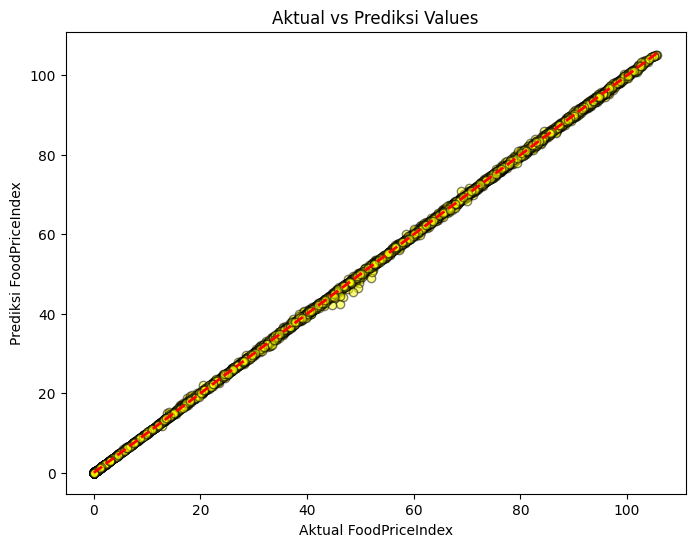

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.5, color='yellow', edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title("Aktual vs Prediksi Values")
plt.xlabel("Aktual FoodPriceIndex")
plt.ylabel("Prediksi FoodPriceIndex")
plt.show()


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(y_test, y_pred)
print(f"sMAPE Score pada Data Validasi: {smape_score:.4f}%")

sMAPE Score pada Data Validasi: 1.8868%


In [ ]:
test_data = pd.read_csv('test_adikara2024_unlabeled.csv')
test_features = pd.get_dummies(test_data.drop(columns=['id']), columns=['Country'], drop_first=True)
test_features = test_features.reindex(columns=train_columns, fill_value=0)

print("Kolom setelah One-Hot Encoding pada Data Test:")
test_predictions = best_model.predict(test_features)

submission = pd.DataFrame({
    'id': test_data['id'],
    'FoodPriceIndex': test_predictions
})

submission.to_csv('submission_Manusia Pelupa_ADIKARA2024.csv', index=False)
print("'submission_Manusia Pelupa_ADIKARA2024.csv'")

Kolom setelah One-Hot Encoding pada Data Test:
'submission_Manusia Pelupa_ADIKARA2024.csv'


In [ ]:
joblib.dump(best_model, 'Model_Manusia Pelupa_ADIKARA2024.pkl')
print("Model berhasil disimpan sebagai 'Model_Manusia Pelupa_ADIKARA2024.pkl'")

Model berhasil disimpan sebagai 'Model_Manusia Pelupa_ADIKARA2024.pkl'


In [ ]:
loaded_model = joblib.load('Model_Manusia Pelupa_ADIKARA2024.pkl')
test_predictions = loaded_model.predict(test_features)
print("Hasil Prediksi:", test_predictions[:5])

Hasil Prediksi: [98.627519 99.8235   96.231    98.320406 99.152104]
